Plotting Fourier series for square wave:


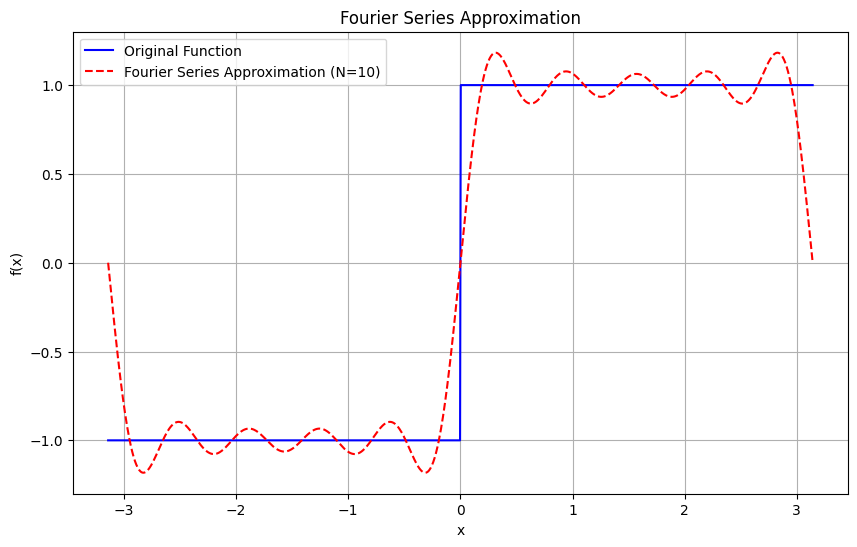

Plotting Fourier series for sawtooth wave:


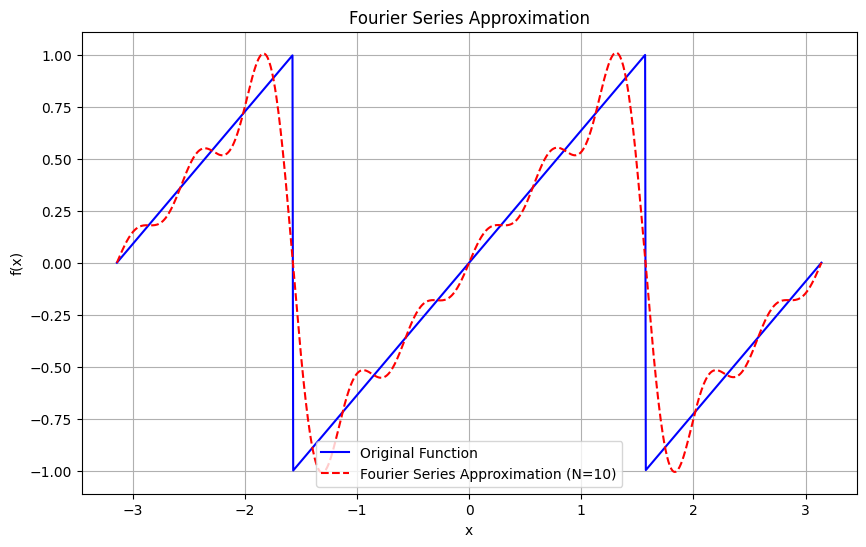

Plotting Fourier series for triangle wave:


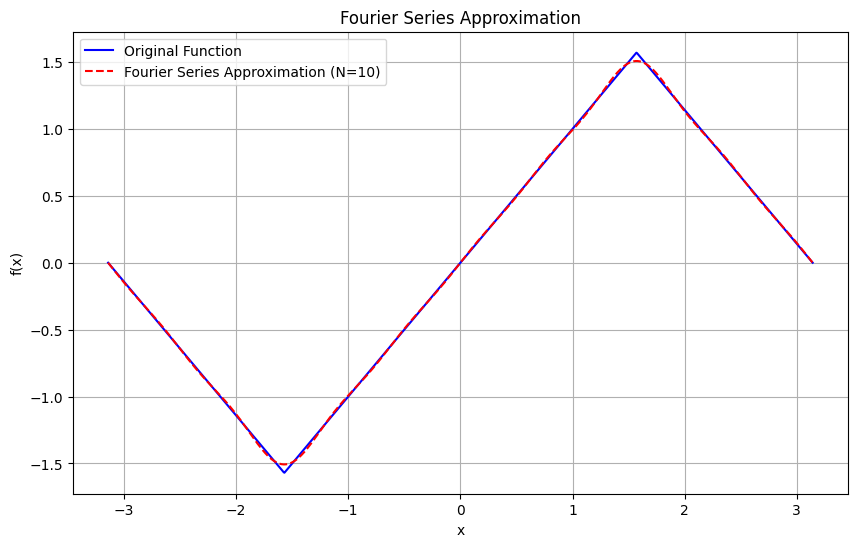

Plotting Fourier series for sine wave:


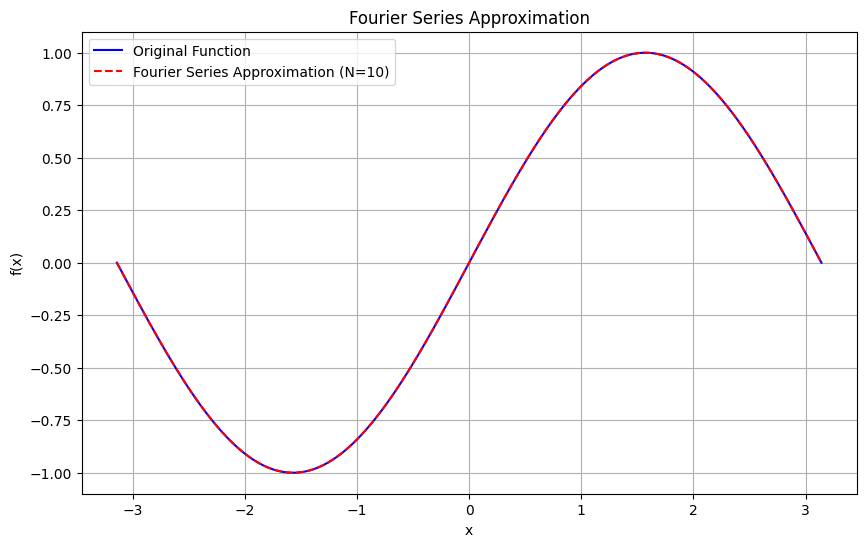

Plotting Fourier series for cosine wave:


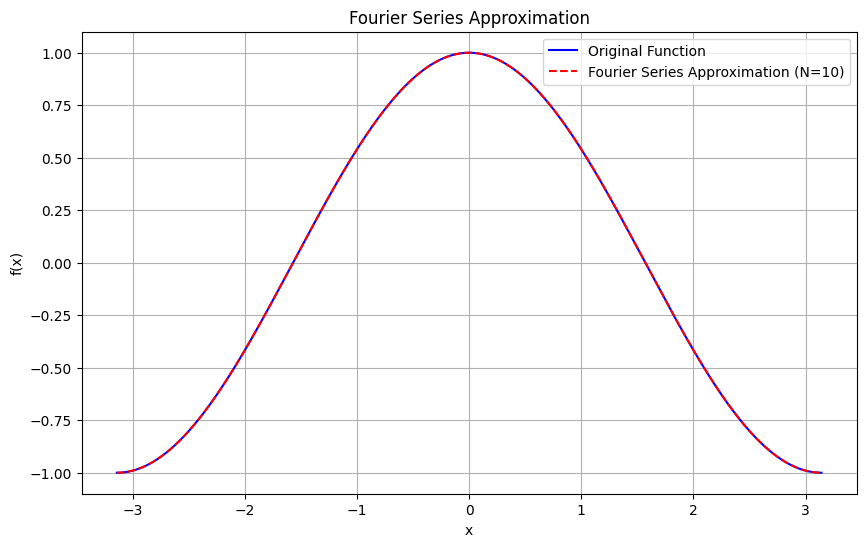

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class FourierSeries:
    def __init__(self, func, L, terms=10):
        """
        Initialize the FourierSeries class with a target function, period L, and number of terms.
        
        Parameters:
        - func: The target function to approximate.
        - L: Half the period of the target function.
        - terms: Number of terms to use in the Fourier series expansion.
        """
        self.func = func
        self.L = L
        self.terms = terms
        pass # Implement this method

    def calculate_a0(self, N=1000):
        """
        Step 1: Compute the a0 coefficient, which is the average (DC component) of the function over one period.
        
        You need to integrate the target function over one period from -L to L.
        For that, you can use the trapezoidal rule with a set of points (N points here) for numerical integration.
        
        Parameters:
        - N: Number of points to use for integration (more points = more accuracy).
        
        Returns:
        - a0: The computed a0 coefficient.
        """
        x = np.linspace(-self.L, self.L, N)
        y = self.func(x)
        a0 = np.trapezoid(y, x, 1/N) / (2 * self.L)
        return a0
        pass  # Implement this method

    def calculate_an(self, n, N=1000):
        """
        Step 2: Compute the an coefficient for the nth cosine term in the Fourier series.
        
        You need to integrate the target function times cos(n * pi * x / L) over one period.
        This captures how much of the nth cosine harmonic is present in the function.
        
        Parameters:
        - n: Harmonic number to calculate the nth cosine coefficient.
        - N: Number of points to use for numerical integration.
        
        Returns:
        - an: The computed an coefficient.
        """
        x = np.linspace(-self.L, self.L, N)
        y = self.func(x)*np.cos(n*np.pi*x/self.L)
        an = np.trapezoid(y, x, 1/N) / (self.L)
        return an
        pass # Implement this method

    def calculate_bn(self, n, N=1000):
        """
        Step 3: Compute the bn coefficient for the nth sine term in the Fourier series.
        
        You need to integrate the target function times sin(n * pi * x / L) over one period.
        This determines the contribution of the nth sine harmonic in the function.
        
        Parameters:
        - n: Harmonic number to calculate the nth sine coefficient.
        - N: Number of points to use for numerical integration.
        
        Returns:
        - bn: The computed bn coefficient.
        """
        x = np.linspace(-self.L, self.L, N)
        y = self.func(x)*np.sin(n*np.pi*x/self.L)
        bn = np.trapezoid(y, x, 1/N) / (self.L)
        return bn

        pass # Implement this method

    def approximate(self, x):
        """
        Step 4: Use the calculated coefficients to build the Fourier series approximation.
        
        For each term up to the specified number of terms, you need to calculate the sum of:
        a0 (the constant term) + cosine terms (an * cos(n * pi * x / L)) + sine terms (bn * sin(n * pi * x / L)).
        
        Parameters:
        - x: Points at which to evaluate the Fourier series.
        
        Returns:
        - The Fourier series approximation evaluated at each point in x.
        """
        # Compute a0 term
        a0 = self.calculate_a0()
        
        # Initialize the series with the a0 term
        series = a0 * np.ones_like(x)
        
        # Compute each harmonic up to the specified number of terms
        for n in range(1, self.terms + 1):
            an = self.calculate_an(n)
            bn = self.calculate_bn(n)
            series += an * np.cos(n * np.pi * x / self.L) + bn * np.sin(n * np.pi * x / self.L)
        
        return series


        pass  # Implement this method




    def plot(self):
        """
        Step 5: Plot the original function and its Fourier series approximation.
        
        You need to calculate the Fourier series approximation over a set of points (x values) from -L to L.
        Then plot both the original function and the Fourier series to visually compare them.
        """
        # Generate points over one period
        # Compute original function values
        # Compute Fourier series approximation

        
        x= None # Implement this line
        original = None # Implement this line
        approximation = None    # Implement this line

        x = np.linspace(-self.L, self.L, 1000)
        original = self.func(x)
        approximation = self.approximate(x)

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(x, original, label="Original Function", color="blue")
        plt.plot(x, approximation, label=f"Fourier Series Approximation (N={self.terms})", color="red", linestyle="--")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend()
        plt.title("Fourier Series Approximation")
        plt.grid(True)
        plt.show()


def target_function(x, function_type="square"):
    """
    Defines various periodic target functions that can be used for Fourier series approximation.
    
    Parameters:
    - x: Array of x-values for the function.
    - function_type: Type of function to use ("square", "sawtooth", "triangle", "sine", "cosine").
    
    Returns:
    - The values of the specified target function at each point in x.
    """
    if function_type == "square":
        # Square wave: +1 when sin(x) >= 0, -1 otherwise
        y = np.where(np.sin(x) >= 0, 1, -1) 
        return y
        pass  # Implement this function
    
    elif function_type == "sawtooth":
        # Sawtooth wave: linearly increasing from -1 to 1 over the period
        y = 2* (x/(np.pi)-np.floor(0.5+x/(np.pi))) ## double sawtooth
        # y = 2* (x/(2*np.pi)-np.floor(0.5+x/(2*np.pi))) ## single sawtooth
        return y
        pass  # Implement this function
    
    elif function_type == "triangle":
        # Triangle wave: periodic line with slope +1 and -1 alternately
        # y = -1* (2 * np.abs((x) % (2*np.pi) - np.pi) - np.pi) ## single triangle (lower)
        # y = (2 * np.abs((x) % (2*np.pi) - np.pi) - np.pi) ## single triangle (upper)
        # y = np.abs(1 * np.abs((x - np.pi/2) % (2*np.pi)-np.pi)-np.pi/2) ## double upper triangle (P=2pi, A=pi/2, with abs value)
        y = (1 * np.abs((x- np.pi/2) % (2*np.pi)-np.pi)-np.pi/2) ## normal triangle (P=2pi, A=pi/2)
        return y
        pass  # Implement this function
    
    elif function_type == "sine":
        # Pure sine wave
        y = np.sin(x)
        return y
        pass  # Implement this function
    
    elif function_type == "cosine":
        # Pure cosine wave
        y = np.cos(x)
        return y
        pass  # Implement this function
    
    else:
        raise ValueError("Invalid function_type. Choose from 'square', 'sawtooth', 'triangle', 'sine', or 'cosine'.")

# Example of using these functions in the FourierSeries class
if __name__ == "__main__":
    L = np.pi  # Half-period for all functions
    terms = 10  # Number of terms in Fourier series

    # Test each type of target function
    for function_type in ["square", "sawtooth", "triangle", "sine", "cosine"]:
        print(f"Plotting Fourier series for {function_type} wave:")
        
        # Define the target function dynamically
        fourier_series = FourierSeries(lambda x: target_function(x, function_type=function_type), L, terms)
        
        # Plot the Fourier series approximation
        fourier_series.plot()
